# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


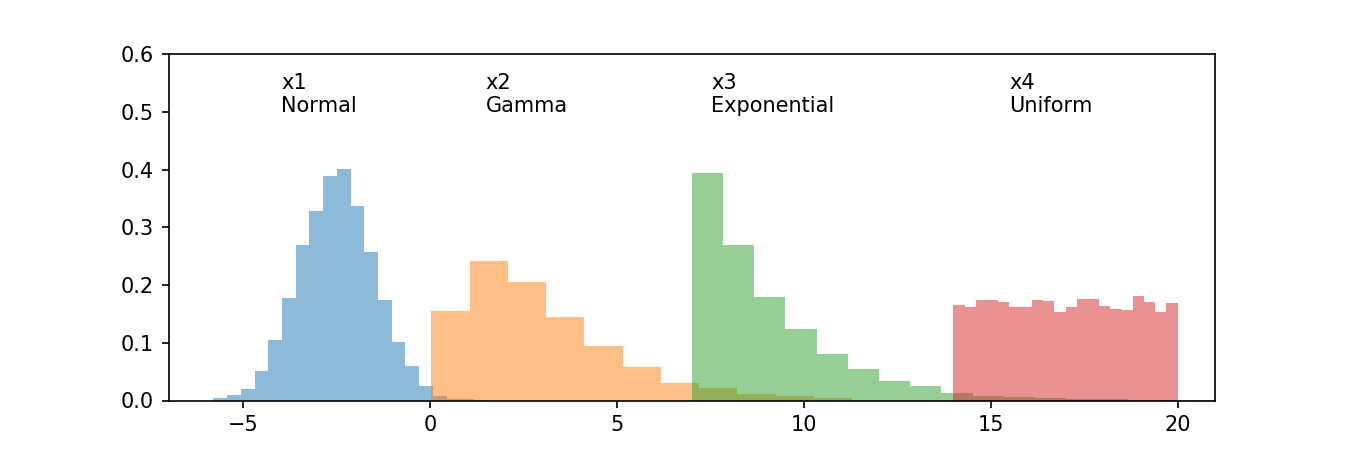

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


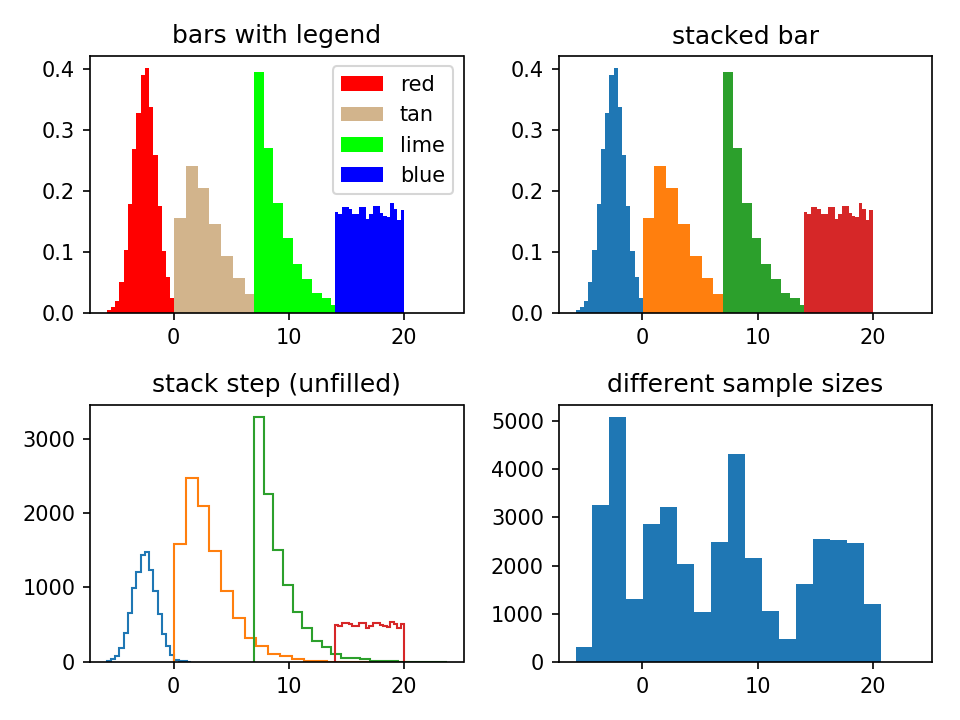

In [3]:
n_bins = 20

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime', 'blue']
ax0.hist(x1, n_bins, normed=1, histtype='bar', color='red', label='red')
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')


ax0.hist(x2, n_bins, normed=1, histtype='bar', color='tan', label='tan')
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')


ax0.hist(x3, n_bins, normed=1, histtype='bar', color='lime', label='lime')
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax0.hist(x4, n_bins, normed=1, histtype='bar', color='blue', label='blue')
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x1, n_bins, normed=1, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax1.hist(x2, n_bins, normed=1, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax1.hist(x3, n_bins, normed=1, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax1.hist(x4, n_bins, normed=1, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x1, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

ax2.hist(x2, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

ax2.hist(x3, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

ax2.hist(x4, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

x_multi = np.concatenate((x1, x2, x3,x4), axis=0)
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')


fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


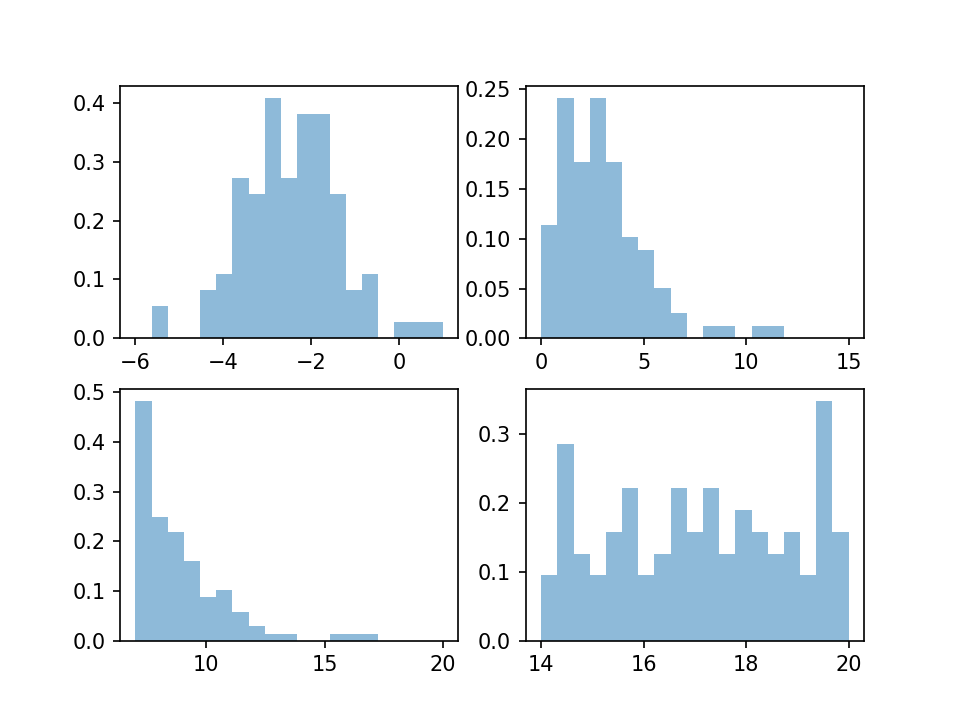

In [4]:
import matplotlib.animation as animation

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 100)
x2 = np.random.gamma(2, 1.5, 100)
x3 = np.random.exponential(2, 100)+7
x4 = np.random.uniform(14,20, 100)


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

def updateData(curr):
    if curr <=2: return
    for ax in (ax1, ax2, ax3, ax4):
        ax.clear()
    ax1.hist(x1[:curr], normed=True, bins=np.linspace(-6,1, num=20), alpha=0.5)
    ax2.hist(x2[:curr], normed=True, bins=np.linspace(0,15,num=20), alpha=0.5)
    ax3.hist(x3[:curr], normed=True, bins=np.linspace(7,20,num=20), alpha=0.5)
    ax4.hist(x4[:curr], normed=True, bins=np.linspace(14,20,num=20), alpha=0.5)

simulation = animation.FuncAnimation(fig, updateData, frames = 1000, interval=10, repeat=False)

plt.show()